https://www.datacamp.com/tutorial/k-means-clustering-python




https://www.youtube.com/watch?v=4b5d3muPQmA&t=33s


The K-Means Algorithm Explained

The algorithm works iteratively to assign each data point to one of K clusters defined by their center points, known as centroids.

1. Initialization (Choose K)

    You must first choose the number of clusters, K.

    The algorithm then randomly or strategically selects K initial points from the data to serve as the starting centroids (μ1​,μ2​,…,μK​).

2. Assignment Step (The E-Step)

    Each data point (x) in the dataset is assigned to the nearest centroid.

    The "nearest" is typically determined by the Euclidean distance (straight-line distance).

    This step creates the K initial clusters (C1​,C2​,…,CK​).

3. Update Step (The M-Step)

    After all points are assigned, the algorithm recalculates the position of each centroid.

    The new centroid for each cluster is the mean (average) of all the data points currently assigned to that cluster.

    This new mean position becomes the new center point (μi​).

4. Convergence

    Steps 2 and 3 are repeated until the centroids no longer move significantly between iterations, meaning the cluster assignments have stabilized.

    The algorithm has successfully minimized the Within-Cluster Sum of Squares (WCSS), or Inertia.

    The primary goal of the K-Means algorithm is to minimize WCSS. A lower WCSS value indicates that the data points within each cluster are closer to their respective centroids, which generally signifies a better, more compact clustering solution.
    

In [27]:
# Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("datasets/Mall_Customers.csv")
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [29]:
# X = df.iloc[:, [3, 4]].values
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

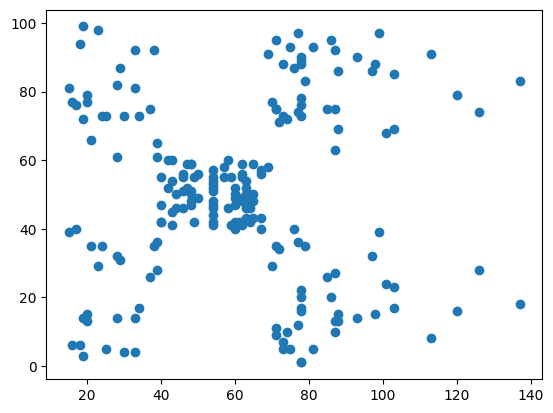

In [30]:
plt.scatter(X[:, 0], X[:, 1])

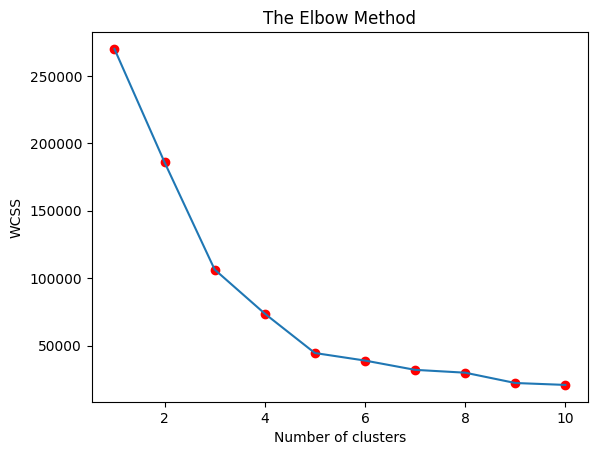

In [31]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss, c="r")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(X)

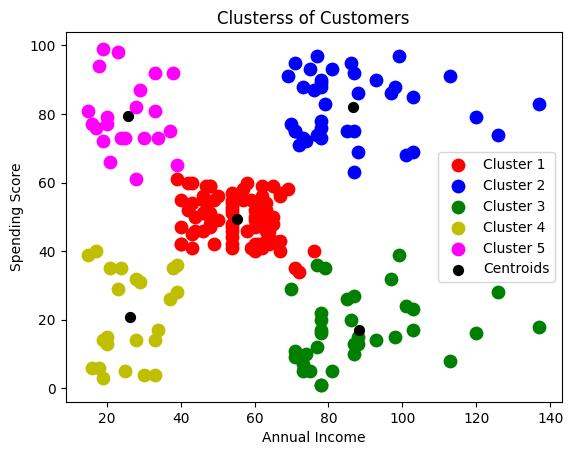

In [36]:
plt.scatter(
    X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, color="r", label="Cluster 1"
)
plt.scatter(
    X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, color="b", label="Cluster 2"
)
plt.scatter(
    X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, color="g", label="Cluster 3"
)
plt.scatter(
    X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, color="y", label="Cluster 4"
)
plt.scatter(
    X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, color="magenta", label="Cluster 5"
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=50,
    c="black",
    label="Centroids",
)
plt.title("Clusterss of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()